In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [36]:
dataset = pd.read_csv('time_series_sales_data.csv')
dataset.head() 

,Date,Sales
0,1/1/2010,52.148326
1,1/2/2010,44.752844
2,1/3/2010,52.395312
3,1/4/2010,63.696258
4,1/5/2010,53.936601


In [37]:
df = pd.read_csv('time_series_sales_data.csv', parse_dates=['Date'])
df.set_index('Date',inplace=True)
df.head()

,Sales
Date,
2010-01-01,52.148326
2010-01-02,44.752844
2010-01-03,52.395312
2010-01-04,63.696258
2010-01-05,53.936601


In [38]:
df = df.resample('M').mean()  

C:\Users\Asus\AppData\Local\Temp\ipykernel_8240\2837733671.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()


Text(0, 0.5, 'Sales')

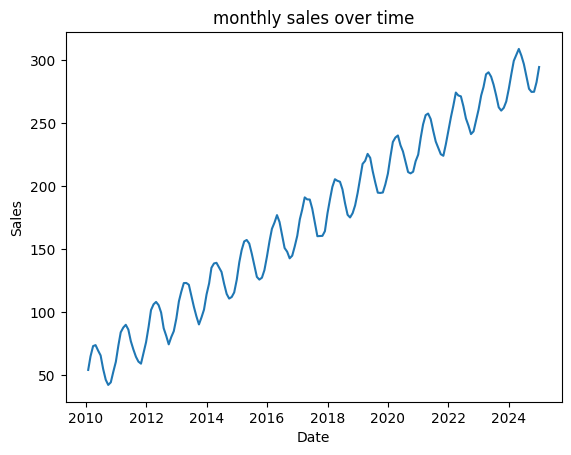

In [39]:
plt.plot(df['Sales'])
plt.title('monthly sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')

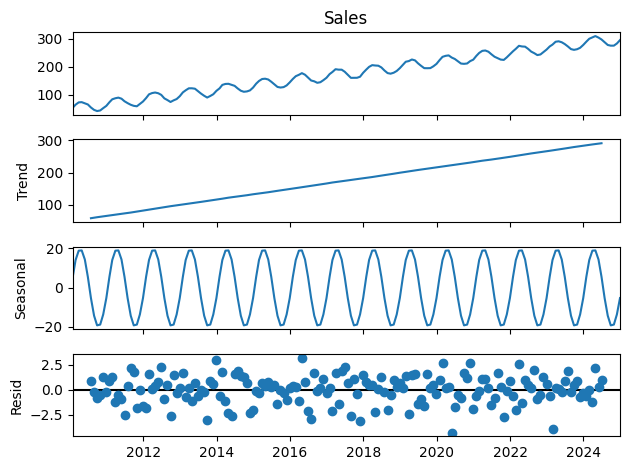

In [40]:
decomposition = seasonal_decompose(df['Sales'], model='additive',period=12)
decomposition.plot()
plt.show()

In [41]:
adf_result = adfuller(df['Sales'])
print("ADF Statistic :",adf_result[0])
print('p-value: ',adf_result[1])

ADF Statistic : -0.00843916006421787
p-value:  0.9578285840650076


* p-value is not sattionary  

* now it covert stationary with differencing

In [42]:
sales_diff = df['Sales'].diff().dropna() 

In [43]:
adf_result = adfuller(sales_diff)       
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -9.336881410540496
p-value: 9.012936945545295e-16


In [45]:
model = auto_arima(
    df['Sales'],   
    seasonal=True,
    m=12,
    trace = True
)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=742.325, Time=0.02 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=705.455, Time=0.54 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1426.125, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=743.377, Time=0.04 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=696.039, Time=1.64 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.45 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.70 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=688.118, Time=1.05 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=704.022, Time=0.26 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.47 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.45 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=691.149, Time=1.10 sec


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=699.550, Time=1.43 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12] intercept
Total fit time: 13.337 seconds


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


* Forecast

In [47]:
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)
forecast_index = pd.date_range(
    start=df.index[-1] + pd.offsets.MonthBegin(1),
    periods=12,
    freq="M"
)
forecast_df = pd.DataFrame({
    'forecast': forecast
},
index=forecast_index
)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_8240\1060850122.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(


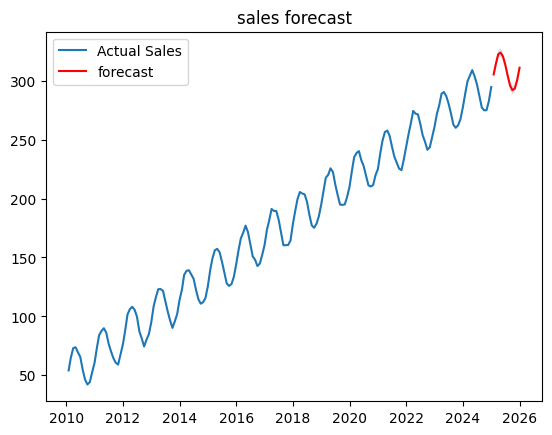

In [50]:
plt.plot(df['Sales'], label='Actual Sales')
plt.plot(forecast_df,label="forecast",data=dataset,color='red')
plt.fill_between(
    forecast_df.index,conf_int[:,0],
    conf_int[:,1],
    alpha = 0.2
)
plt.legend()
plt.title('sales forecast')
plt.show()

* here predicting how the next year sell will be.

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
train = df[:-12]
test = df[-12:]

In [54]:
model1 = auto_arima(
    train['Sales'],
    seasonal=True,
    m=12,
    suppress_warnings=True
)


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed 

In [56]:
predict = model.predict(n_periods=12)
predict

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2025-01-31    305.386314
2025-02-28    314.076802
2025-03-31    322.458975
2025-04-30    323.859184
2025-05-31    320.616137
2025-06-30    313.636498
2025-07-31    304.264089
2025-08-31    295.905426
2025-09-30    291.979843
2025-10-31    293.396804
2025-11-30    300.511798
2025-12-31    310.975328
Freq: ME, dtype: float64

* here predict the next 12 months

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_squared_error(test['Sales'],predict)
rmse = np.sqrt(mean_squared_error(test['Sales'],predict))

In [58]:
print("MAE: ",mae)
print("RMSE: ",rmse)

MAE:  286.42625420549496
RMSE:  16.924132302883212


In [59]:
model2 = auto_arima(train['Sales'], seasonal=False)
pred2 = model2.predict(n_periods=12)

rmse2 = np.sqrt(mean_squared_error(test['Sales'], pred2))


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed 